In [2]:
from sklearn.datasets import load_digits

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# 1.Data Prepration

In [5]:
digits = load_digits()

In [6]:
X=digits.data
Y=digits.target

In [7]:
X.shape,Y.shape

((1797, 64), (1797,))

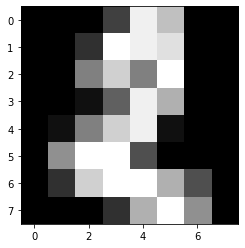

In [8]:
plt.imshow(X[2].reshape(8,8),cmap='gray')

In [9]:
print(Y[2])
print(X[2])

2
[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]


# Train Models

In [10]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [11]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [12]:
gnb.fit(X,Y)
mnb.fit(X,Y)

MultinomialNB()

In [13]:
gnb.score(X,Y)

0.8580968280467446

In [14]:
mnb.score(X,Y)

0.9053978853644964

In [15]:
cross_val_score(mnb,X,Y,scoring = 'accuracy',cv=10)

array([0.85555556, 0.93888889, 0.91111111, 0.78333333, 0.87222222,
       0.85      , 0.97222222, 0.94413408, 0.80446927, 0.86592179])

In [16]:
cross_val_score(mnb,X,Y,scoring = 'accuracy',cv=10).mean()

0.8797858472998138

In [17]:
cross_val_score(gnb,X,Y,scoring = 'accuracy',cv=10)

array([0.76111111, 0.81666667, 0.90555556, 0.68333333, 0.73888889,
       0.83888889, 0.86666667, 0.86592179, 0.82681564, 0.81005587])

In [18]:
cross_val_score(gnb,X,Y,scoring = 'accuracy',cv=10).mean()

0.8113904407200497

In [19]:
# So Multinomial perform better because data is discrete.

## Generating Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
y_mnb = mnb.predict(X)

cnf_matrix = confusion_matrix(Y,y_mnb)

## Visualizing Confusion matrix

In [24]:
"""This function is copied from website of scikit .
This function prints and plot the confusion matrix.
Normalization can be applied by setting normalize = true.
"""
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [26]:
class_labels = np.arange(10)
class_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


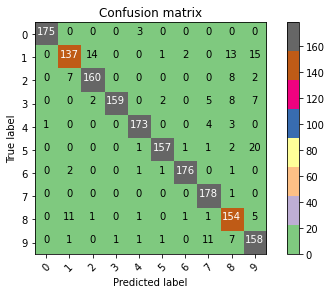

In [29]:
plot_confusion_matrix(cnf_matrix, class_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Accent)

## using Gaussian

In [31]:
y_gnb = gnb.predict(X)

cnf1_matrix = confusion_matrix(Y,y_gnb)

Confusion matrix, without normalization
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


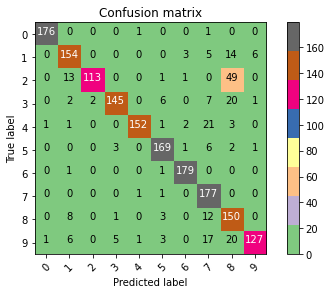

In [32]:
plot_confusion_matrix(cnf1_matrix, class_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Accent)